# EJERCICIO 1
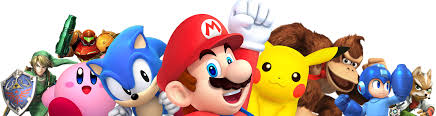

In [154]:
#Importar y Declarar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings

In [155]:
#Configurando el Notebook para Visualizar mejor los datos
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',999) # ayuda a ver más columnas del dataset
#pd.set_option("max_rows", 100)

In [156]:
#Cargar Data de CSV en Dataframe
df = pd.read_csv('/Users/diegoa.rozo/UJaveriana/Ejercicio_1/games_sales_data.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# Filtrado de Información para un escenario específico. 
# Escenario: Validar todos los juegos lanzados en el año 2015. Posteriormente, 
# validaremos el total de ventas globales realizadas por las plataformas de PS4, Xbox 

df_filtro = df[df['Year_of_Release']==2015.0].copy()
df_filtro = df_filtro[df_filtro.Platform.isin(['PS4', 'XOne'])]
df_filtro.groupby('Name')['Global_Sales'].sum()

Name
Adventure Time: Finn & Jake Investigations    0.14
Arcania: Gothic 4                             0.05
Arslan: The Warriors of Legend                0.09
Assassin's Creed Chronicles: China            0.04
Assassin's Creed Syndicate                    4.69
                                              ... 
Wasteland 2                                   0.16
Wolfenstein: The Old Blood                    0.58
Yakuza Zero: The Place of Oath                0.17
Yoru no Nai Kuni                              0.08
Zombie Army Trilogy                           0.31
Name: Global_Sales, Length: 145, dtype: float64

In [158]:
#Mismo escenario pero con los valores ordenados
df_filtro = df[df['Year_of_Release']==2015.0].copy()
df_filtro = df_filtro[df_filtro.Platform.isin(['PS4', 'XOne'])]
df_filtro.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

Name
Call of Duty: Black Ops 3                22.02
FIFA 16                                  11.82
Star Wars Battlefront (2015)             11.64
Fallout 4                                11.38
NBA 2K16                                  6.22
                                         ...  
Blade Arcus from Shining EX               0.02
Natsuiro High School: Seishun Hakusho     0.02
Professional Farmer 2016                  0.02
Chaos;Child                               0.01
Raven's Cry                               0.01
Name: Global_Sales, Length: 145, dtype: float64

In [159]:
# Vamos a calcular el valor total de las ventas a nivel porcentual y ver cómo se contribuye al 100% de las ventas
df_top = pd.DataFrame()
df_top['Sales'] = df_filtro.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
df_top['Sales_perct'] = 100*df_top['Sales']/df_top['Sales'].sum()
df_top['Sales_perct_cum'] = df_top['Sales_perct'].cumsum()
df_top.head(10)

,Sales,Sales_perct,Sales_perct_cum
Name,,,
Call of Duty: Black Ops 3,22.02,12.298241,12.298241
FIFA 16,11.82,6.601508,18.899749
Star Wars Battlefront (2015),11.64,6.500977,25.400726
Fallout 4,11.38,6.355767,31.756493
NBA 2K16,6.22,3.473890,35.230383
Madden NFL 16,5.66,3.161128,38.391511
Batman: Arkham Knight,5.44,3.038257,41.429768
The Witcher 3: Wild Hunt,5.28,2.948897,44.378665
Assassin's Creed Syndicate,4.69,2.619380,46.998045


In [160]:
df_top['top_juegos'] = np.where(df_top.Sales_perct_cum<50.0,1,0)
df_top.head(11)

,Sales,Sales_perct,Sales_perct_cum,top_juegos
Name,,,,
Call of Duty: Black Ops 3,22.02,12.298241,12.298241,1
FIFA 16,11.82,6.601508,18.899749,1
Star Wars Battlefront (2015),11.64,6.500977,25.400726,1
Fallout 4,11.38,6.355767,31.756493,1
NBA 2K16,6.22,3.473890,35.230383,1
Madden NFL 16,5.66,3.161128,38.391511,1
Batman: Arkham Knight,5.44,3.038257,41.429768,1
The Witcher 3: Wild Hunt,5.28,2.948897,44.378665,1
Assassin's Creed Syndicate,4.69,2.619380,46.998045,1


In [161]:
# Escenario
# Validar del top 10 mostrado anteriormente, 
# ¿cuánto fué la suma aportada por estos 10 juegos, versus el resto de juegos?
df_top.groupby('top_juegos')['Sales'].sum()

top_juegos
0    90.28
1    88.77
Name: Sales, dtype: float64

In [162]:
#Observamos que, de un total de 10 juegos, se aportan 88.77M versus 135 que aportan 90.28
df_top.count()

Sales              145
Sales_perct        145
Sales_perct_cum    145
top_juegos         145
dtype: int64

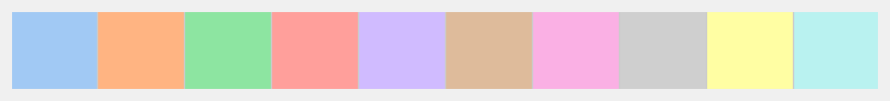

In [163]:
current_palette = sns.color_palette("pastel")[0:10]
sns.palplot(current_palette)
plt.show()

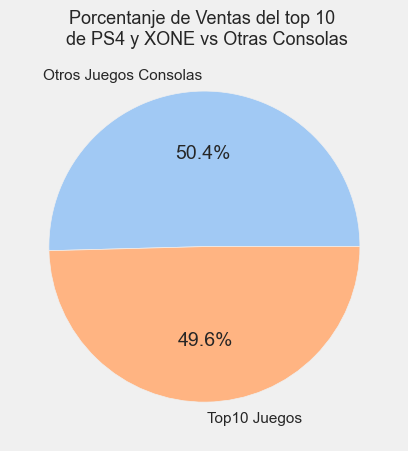

In [164]:
# Escenario: Luego de tratar los datos, ¡empecemos con las visualizaciones!
#Inicialización de la Figura
fig, ax = plt.subplots(1,1)
# Set de Colores - Ref: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette 
colors = sns.color_palette("pastel")[0:10]
labels = ['Otros Juegos Consolas', 'Top10 Juegos']

# Visualización Tipo Torta
ax.pie(df_top.groupby('top_juegos')['Sales'].sum(), labels = labels, colors = colors, autopct='%1.1f%%' )
plt.title('Porcentanje de Ventas del top 10 \n de PS4 y XONE vs Otras Consolas', fontsize=13)
plt.show()


In [165]:
#Exportar a un Archivo La Visualización
fig.savefig('exportVis.jpeg', dpi=1200)

Text(0.5, 1.0, 'Ventas del Top 10 de PS4 y XOne')

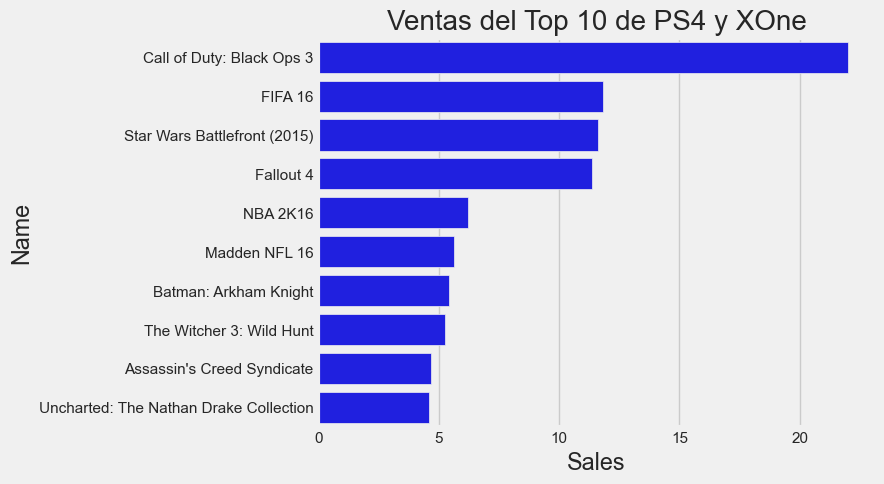

In [166]:
#Escenario
#Se desea detallar el total de ventas del top 10 de juegos (Pasamos de un Macro a un específico).
bar_plot = sns.barplot(y = df_top[df_top['top_juegos']==1].index, x = 'Sales', data = df_top[df_top['top_juegos']==1], color = 'blue', orient='h', )
plt.title('Ventas del Top 10 de PS4 y XOne', fontsize=20)

In [61]:
#Guardar Imagen
bar_plot.figure.savefig("Bar_Export.png", dpi=600, bbox_inches='tight')

# EJERCICIO 2
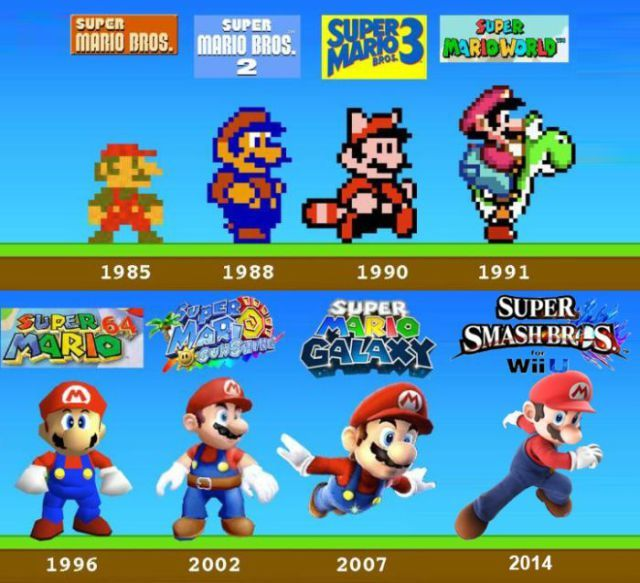

In [62]:
#Importar y Declarar Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings

In [63]:
#Configurando el Notebook para Visualizar mejor los datos
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',999) # ayuda a ver más columnas del dataset
#pd.set_option("max_rows", 100)

In [64]:
#Cargar Data de CSV en Dataframe
df = pd.read_csv('/Users/diegoa.rozo/UJaveriana/Ejercicio_1/games_sales_data.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Vamos a calcular el valor total de las ventas a nivel porcentual y ver cómo se contribuye al 100% de las ventas, 
# pero en este caso será por Género
df_top = pd.DataFrame()
df_top['Sales'] = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
df_top['Sales_perct'] = 100*df_top['Sales']/df_top['Sales'].sum()
df_top['Sales_perct_cum'] = df_top['Sales_perct'].cumsum()
df_top.head(10)

,Sales,Sales_perct,Sales_perct_cum
Genre,,,
Action,1745.27,19.570458,19.570458
Sports,1332.00,14.936285,34.506744
Shooter,1052.94,11.807066,46.313810
Role-Playing,934.40,10.477827,56.791637
Platform,828.08,9.285615,66.077252
Misc,803.18,9.006401,75.083652
Racing,728.90,8.173467,83.257119
Fighting,447.48,5.017784,88.274904
Simulation,390.42,4.377946,92.652850


In [70]:
#Filtrado por El año de Lanzamiento
#Agrupación por Año de Lanzamiento
#Revisamos el total de ventas como la sumatoria
df_for_Review = df[df['Year_of_Release']<=2015.0].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()
df_for_Review.head(5)

,Year_of_Release,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


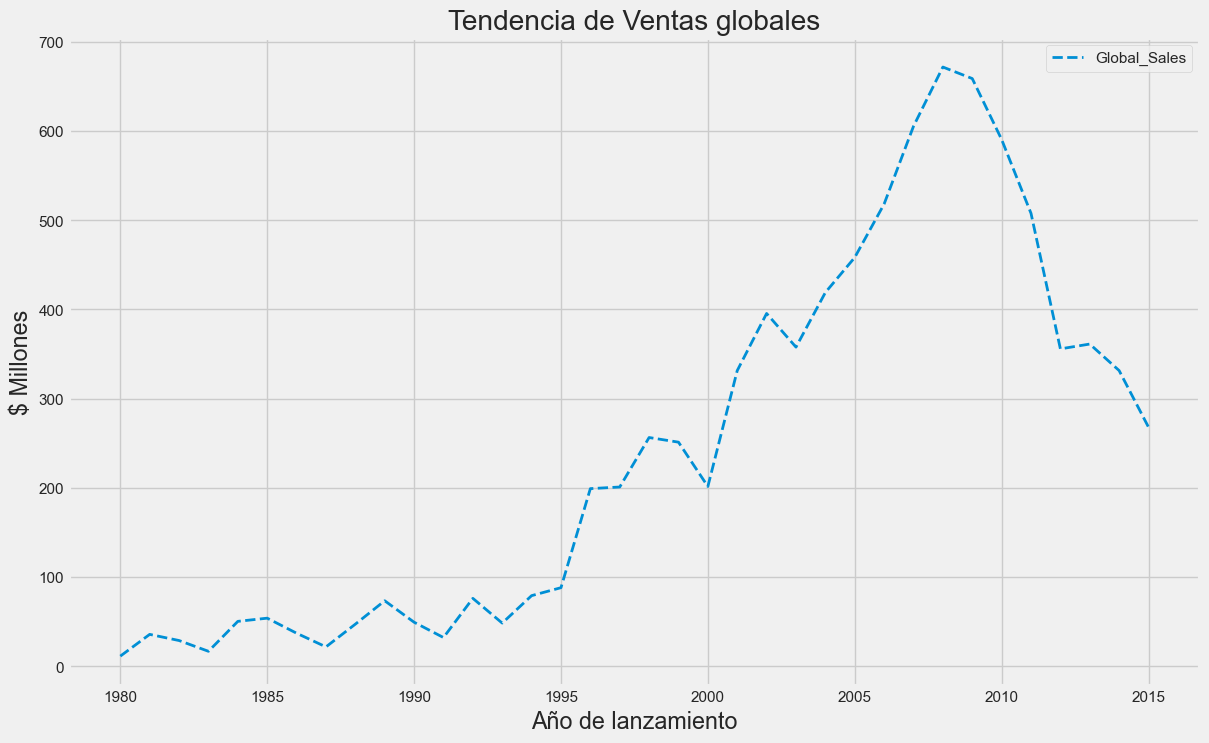

In [72]:
plot1 = df[df['Year_of_Release']<=2015.0].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()\
.plot(x='Year_of_Release', y = 'Global_Sales', figsize=(13,8), 
      title="Tendencia de Ventas globales", 
      xlabel = 'Año de lanzamiento' , ylabel='$ Millones',
      style=['--'], linewidth=2.0)

In [81]:
#Escenario
#En el 2015 encontramos una baja importante en la tendencia de los datos de ventas. 
#¿Podría deberse a algún cambio específico en un genéro? ¿Tema global?
df_tendencias = df[['Year_of_Release', 'Genre', 'Global_Sales']].copy()
df_tendencias = df_tendencias[df_tendencias.Year_of_Release>=2000.0] 
df_tendencias = df_tendencias[df_tendencias.Year_of_Release<=2015.0]
df_tendencias = df_tendencias[df_tendencias.Genre.isin(['Action','Sports', 'Shooter', 'Role-Playing','Platform' ])]
df_tendencias.head()

,Year_of_Release,Genre,Global_Sales
0,2006.0,Sports,82.53
3,2009.0,Sports,32.77
6,2006.0,Platform,29.80
8,2009.0,Platform,28.32
13,2007.0,Sports,22.70


In [82]:
df_plot = df_tendencias.reset_index().groupby(['Year_of_Release', 'Genre'], as_index=False)['Global_Sales'].sum()
df_plot.head(5)

,Year_of_Release,Genre,Global_Sales
0,2000.0,Action,34.04
1,2000.0,Platform,16.06
2,2000.0,Role-Playing,29.03
3,2000.0,Shooter,6.81
4,2000.0,Sports,41.19


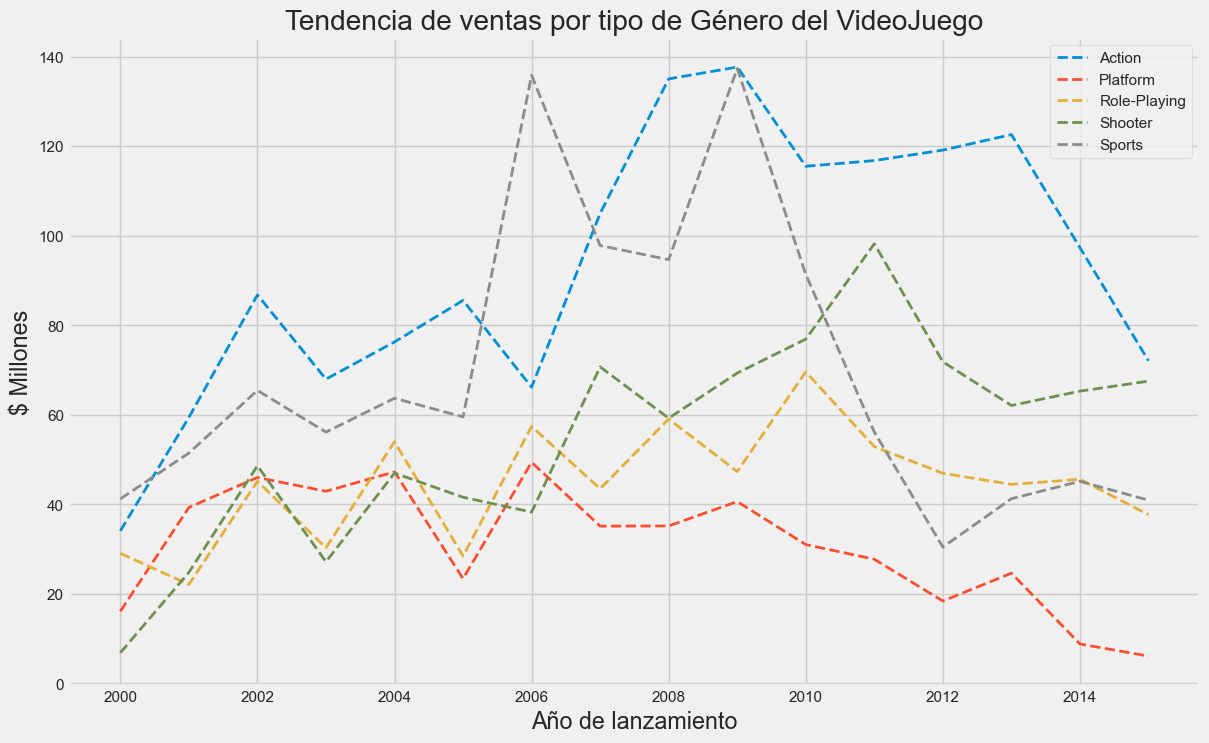

In [83]:
fig, ax = plt.subplots()

for key, data in df_plot.groupby('Genre'):
  data.plot(x='Year_of_Release', y='Global_Sales', ax=ax, label=key, figsize=(13,8), 
            title="Tendencia de ventas por tipo de Género del VideoJuego", 
            xlabel = 'Año de lanzamiento' , ylabel='$ Millones',
            style=['--'], linewidth=2.0)


In [84]:
#Guardar Figura
fig.savefig('PlotByGen.jpeg', dpi=1200, bbox_inches='tight')

In [90]:
df_tendencias = df[['Year_of_Release', 'Genre', 'Global_Sales']].copy()
df_tendencias = df_tendencias[df_tendencias.Year_of_Release>=2000.0] 
df_tendencias = df_tendencias[df_tendencias.Year_of_Release<=2015.0]

In [91]:
df_plot = df_tendencias.reset_index().groupby(['Year_of_Release', 'Genre'], as_index=False)['Global_Sales'].sum()
df_plot.head(5)

,Year_of_Release,Genre,Global_Sales
0,2000.0,Action,34.04
1,2000.0,Adventure,2.98
2,2000.0,Fighting,20.22
3,2000.0,Misc,15.54
4,2000.0,Platform,16.06


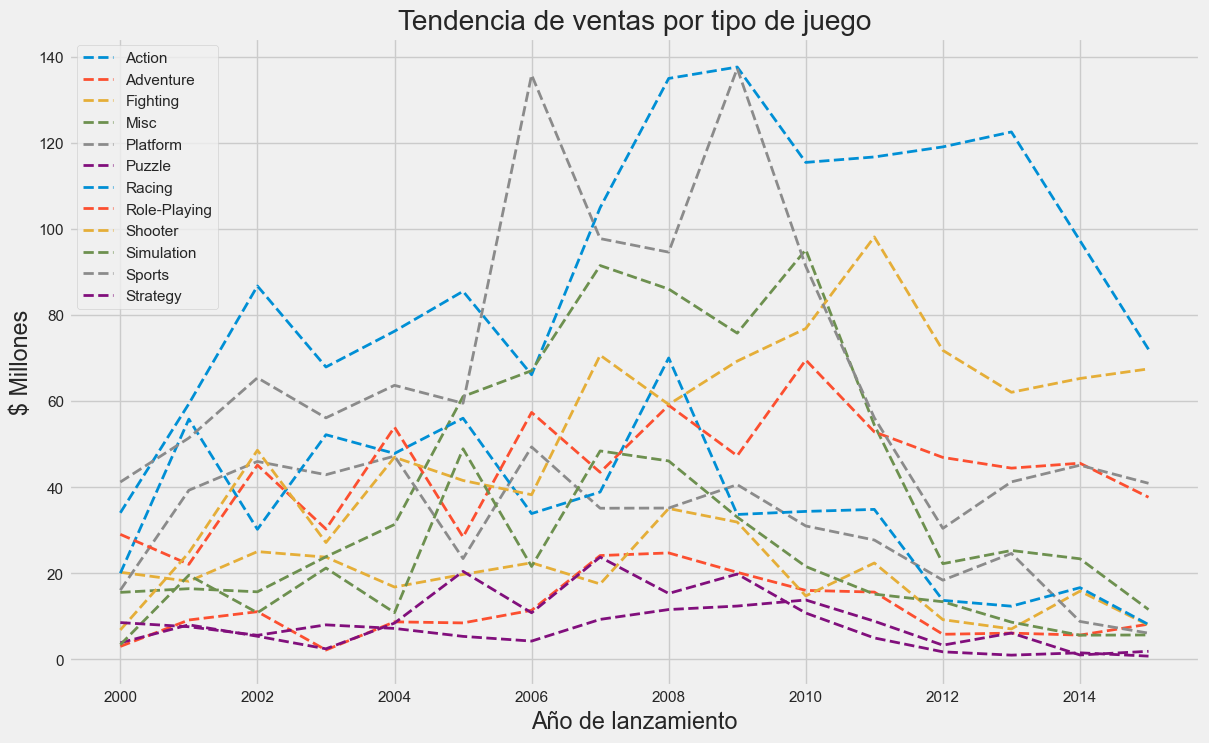

In [92]:
fig, ax = plt.subplots()

for key, data in df_plot.groupby('Genre'):
  data.plot(x='Year_of_Release', y='Global_Sales', ax=ax, label=key, figsize=(13,8), 
            title="Tendencia de ventas por tipo de juego", 
            xlabel = 'Año de lanzamiento' , ylabel='$ Millones',
            style=['--'], linewidth=2.0)
#¿Qué diferencia Observas?

In [93]:
#Guardar Figura
fig.savefig('PlotByGenAll.jpeg', dpi=1200, bbox_inches='tight')

# Ejercicio 3
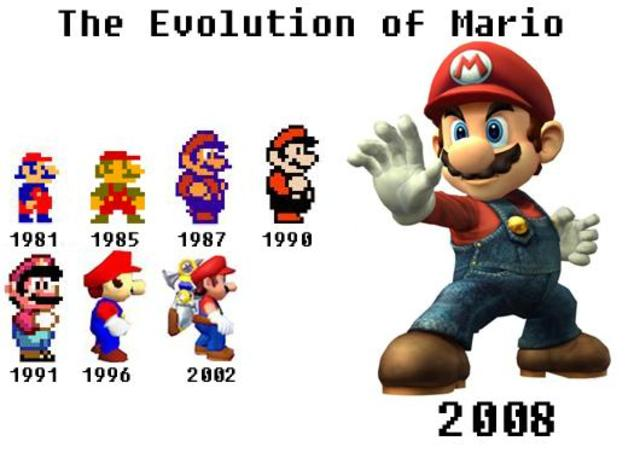

In [94]:
#Escenario: Trabajaremos con los años 2015, 2014 y 2013, con el fin de preguntarnos:
#¿Total de ventas por año? ¿Cómo las comparamos? A su vez, ¿Qué género presento mayor aporte a las ventas?
df_filtro = df[df.Year_of_Release.isin([2015.,2014.,2013.])].copy()
df_filtro.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M


In [100]:
df_bars = pd.DataFrame()
#Iteraremos recordemos sobre una lista, donde hay diferentes valores (2013-2014-2015)
for year in list(df_filtro.Year_of_Release.unique()):
  df_year = df_filtro[df_filtro['Year_of_Release']==year]
  #Agrupamos por Género, Totalizamos las ventas y Hacemos el Sort.
  df_year = df_year.groupby('Genre', as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales',ascending=False)
  #Agregamos una columna adicional con el total de ventas como hicimos en ejercicios anteriores.
  df_year['Sales_perct'] = 100*df_year['Global_Sales']/df_year['Global_Sales'].sum()
  df_year['year']=year
  if df_bars is None:
    df_bars = df_year
  df_bars = pd.concat([df_bars, df_year], axis=0)

df_bars.head(15)

,Genre,Global_Sales,Sales_perct,year
0,Action,122.57,33.930351,2013.0
8,Shooter,62.05,17.176946,2013.0
7,Role-Playing,44.42,12.296534,2013.0
10,Sports,41.23,11.413465,2013.0
3,Misc,25.28,6.998118,2013.0
4,Platform,24.59,6.807109,2013.0
6,Racing,12.33,3.413243,2013.0
9,Simulation,8.62,2.386225,2013.0
2,Fighting,7.04,1.948843,2013.0
11,Strategy,6.09,1.685860,2013.0


In [102]:
#Pivot = Tabla Dinámica
df_plot = df_bars.pivot(index='year', columns='Genre', values='Sales_perct')

Text(0.5, 1.0, 'Porcentaje de ventas por género de juego en cada año')

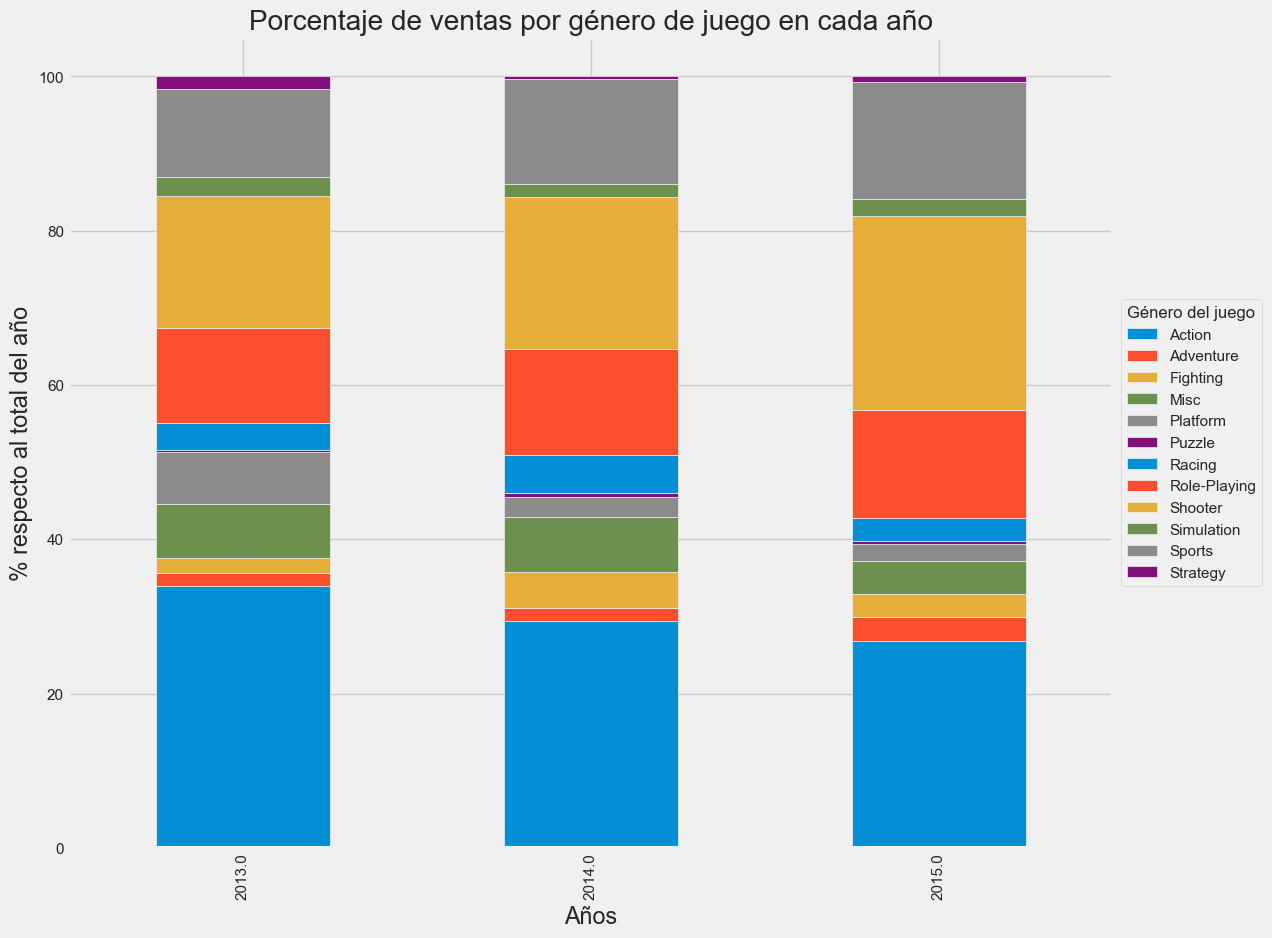

In [103]:
# Creamos la Visualización
bar = df_plot.plot(kind='bar', stacked=True, figsize=(12,10))

# labels para x & y
plt.xlabel('Años', )
plt.ylabel('% respecto al total del año')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# titulo del plot
plt.title('Porcentaje de ventas por género de juego en cada año')

In [104]:
#Guardamos Archivo
bar.figure.savefig("BarStackedByGen.png", dpi=600, bbox_inches='tight')

In [105]:
# Escenario: Revisemos ahora, la comparación por valor total de ventas por Género por Año
df_plot = df_bars.pivot(index='year', columns='Genre', values='Global_Sales')

Text(0.5, 1.0, 'Total $ de ventas por8 género de juego en cada año')

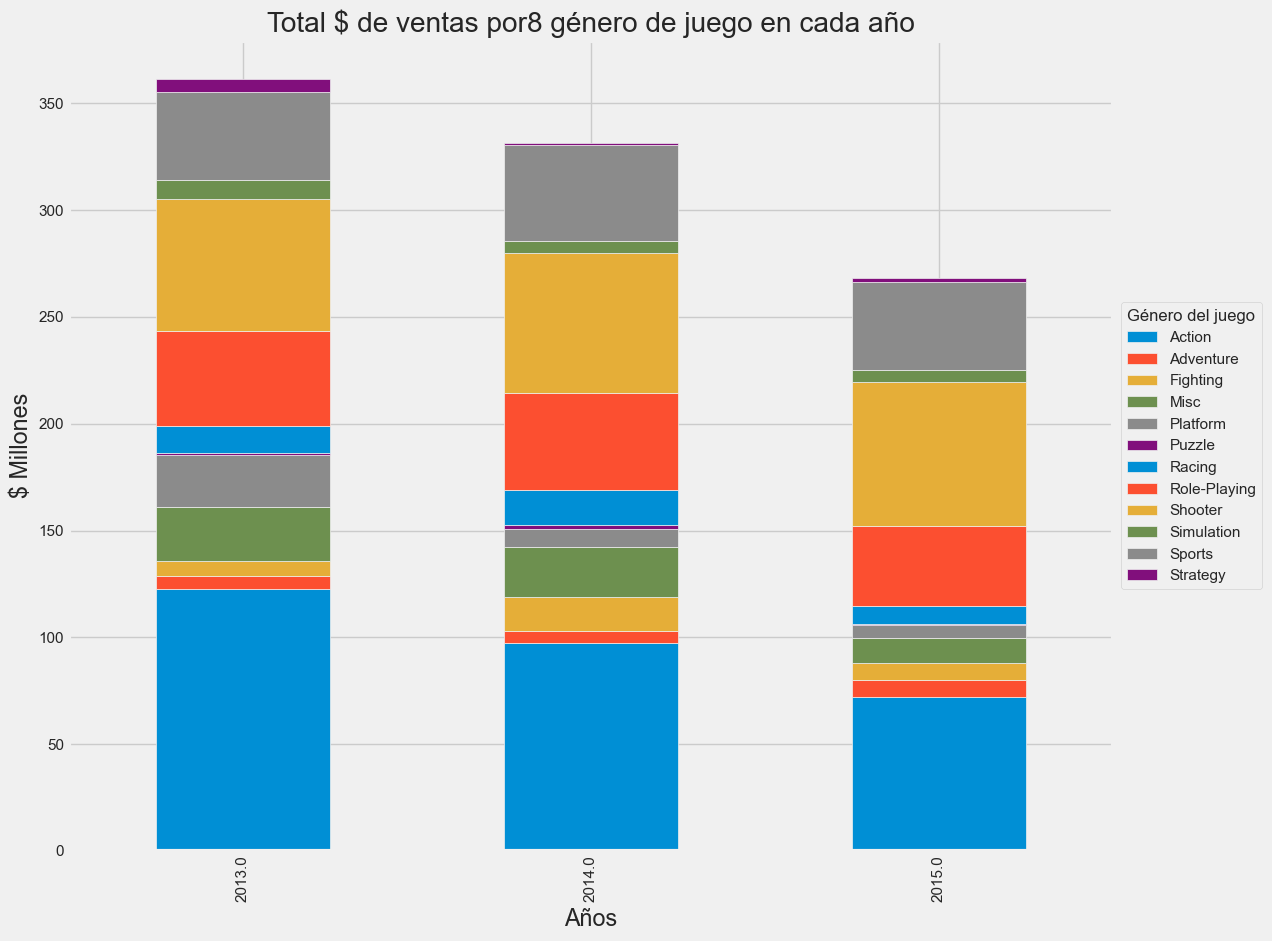

In [106]:
#Creamos la visualización
bar2 = df_plot.plot(kind='bar', stacked=True, figsize=(12,10))

# labels para x & y
plt.xlabel('Años', )
plt.ylabel('$ Millones')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# titulo del plot
plt.title('Total $ de ventas por8 género de juego en cada año')

In [107]:
#Guardamos el Archivo
bar2.figure.savefig("BarStackedByGenByYearInMillions.png", dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Porcentaje de ventas por género de juego en cada año')

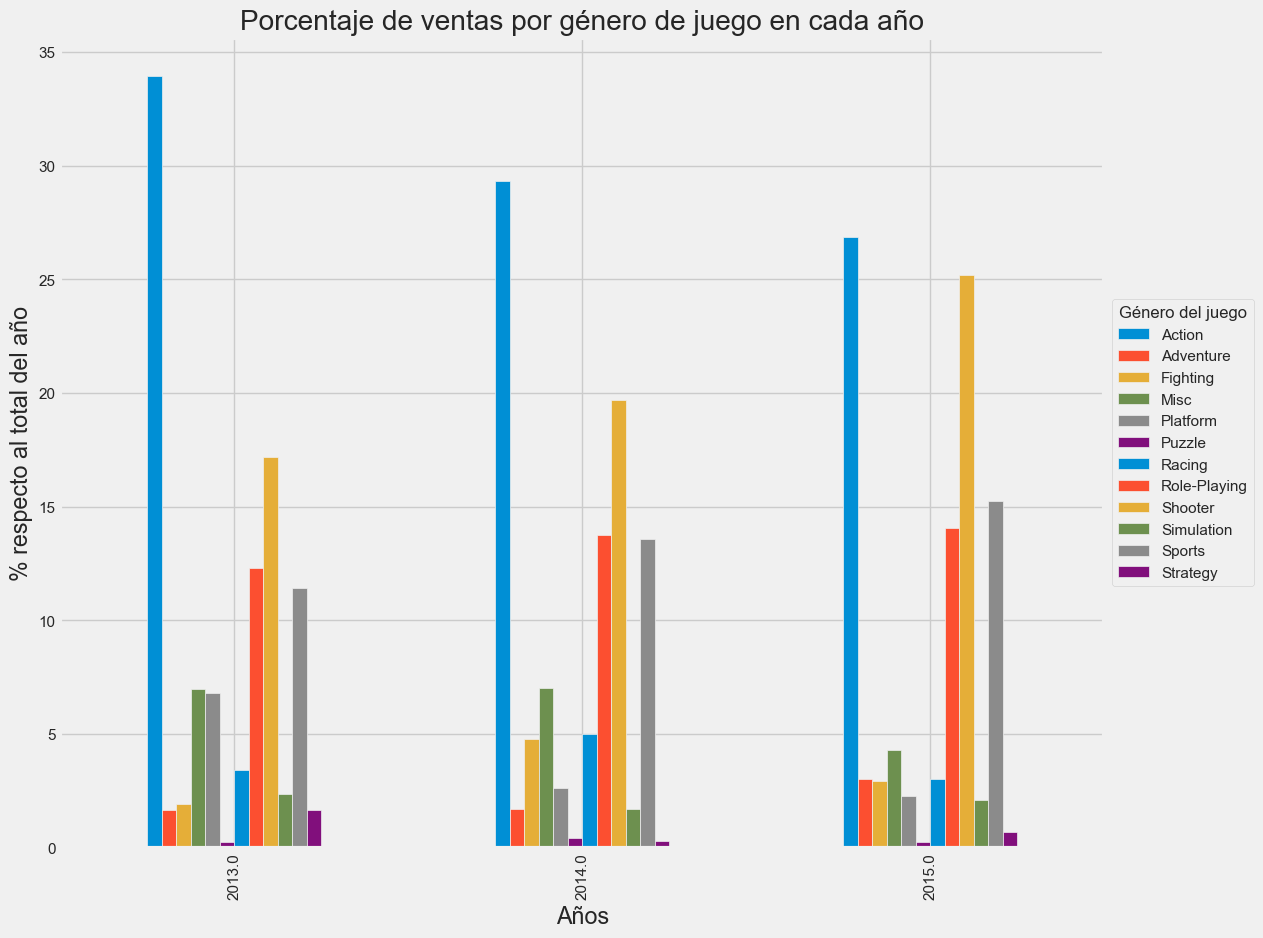

In [108]:
#Escenario: Alternativa de Visualización para Comparar
df_plot = df_bars.pivot(index='year', columns='Genre', values='Sales_perct')

bar = df_plot.plot(kind='bar', figsize=(12,10))

# labels for x & y axis
plt.xlabel('Años', )
plt.ylabel('% respecto al total del año')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# title of plot
plt.title('Porcentaje de ventas por género de juego en cada año')

In [113]:
#Guardamos el Archivo
bar2.figure.savefig("BarStackedByGenByYearInMillions2.png", dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Total $ de ventas por género de juego en cada año')

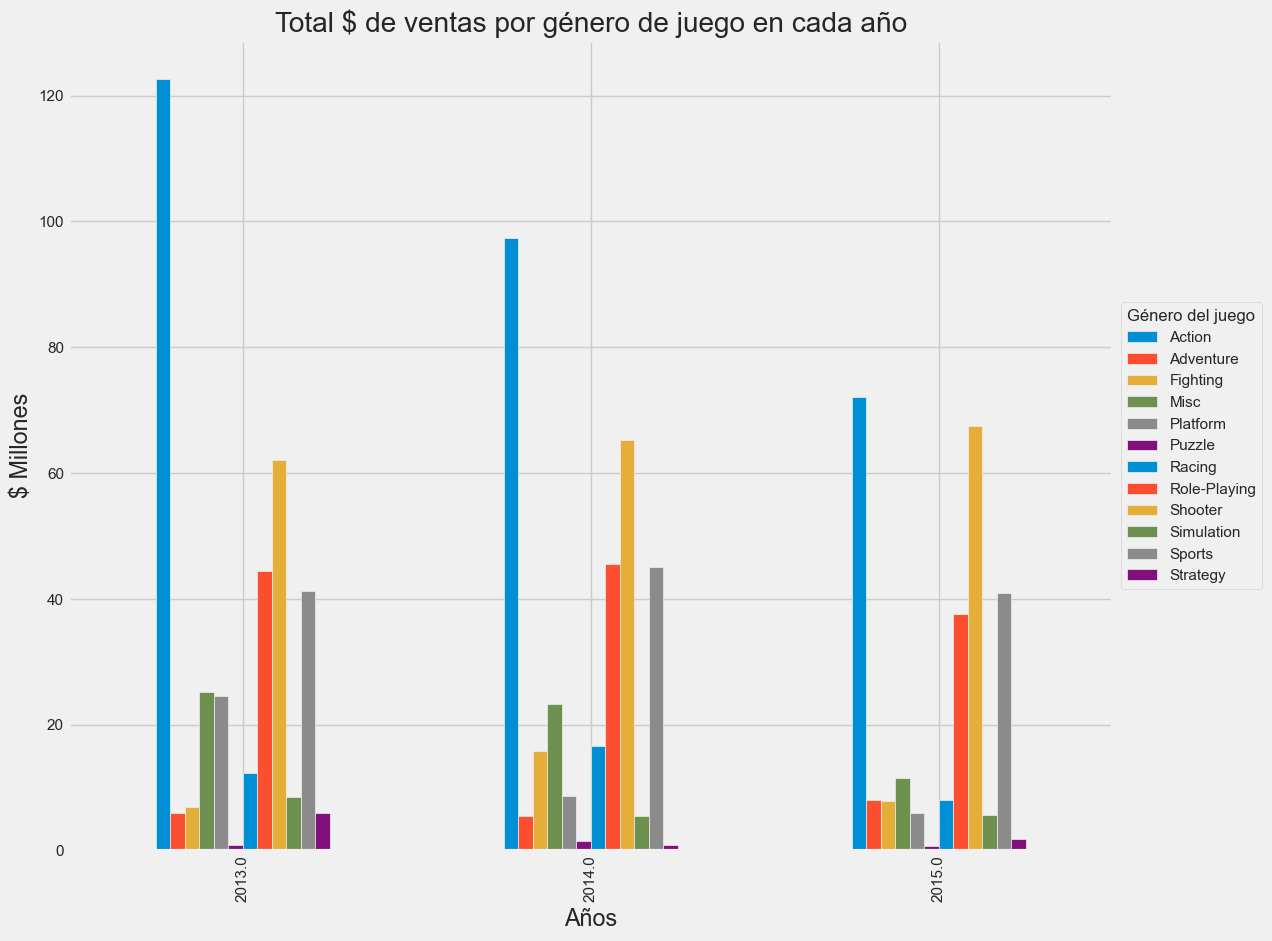

In [114]:
#Alternativa para Verificar el total de Ventas por género por años.

df_plot = df_bars.pivot(index='year', columns='Genre', values='Global_Sales')

bar2 = df_plot.plot(kind='bar', figsize=(12,10))

# labels para x & y
plt.xlabel('Años', )
plt.ylabel('$ Millones')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# titulo del plot
plt.title('Total $ de ventas por género de juego en cada año')

In [111]:
#Guardamos el Archivo
bar2.figure.savefig("BarStackedByGenByYearInMillions2_1.png", dpi=600, bbox_inches='tight')

In [115]:
#Escenario: Queremos validar las proporciones y muchas veces el tipo de gráficos de barras son difíciles de leer
#Podemos apoyarnos de visualizaciones alternativas como: Gráfico de Tortas!
# Vamos a revisar las proporciones en el género de Sports, Shooter y Fighting
df_filtro = df[df.Year_of_Release.isin([2015.,2014.,2013., 2012., 2011. ])].copy()
df_filtro = df_filtro[df_filtro.Genre.isin(['Sports', 'Shooter', 'Fighting'])]

In [116]:
df_sports = df_filtro[df_filtro['Genre']=='Sports']
df_sports.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.30,0.11,1.39,6.65,NaN,NaN,NaN,NaN,NaN,NaN
126,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.24,0.07,1.37,6.47,86.0,37.0,4.3,576.0,EA Canada,E
143,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.80,4.33,0.05,0.90,6.08,82.0,47.0,5.7,988.0,EA Sports,E
264,FIFA 15,PS3,2014.0,Sports,Electronic Arts,0.58,3.02,0.04,0.64,4.28,NaN,NaN,4.5,109.0,EA Sports,E


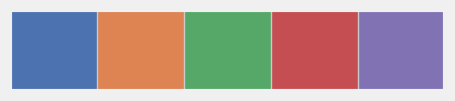

In [117]:
current_palette = sns.color_palette("deep")[0:5]
sns.palplot(current_palette)
plt.show()

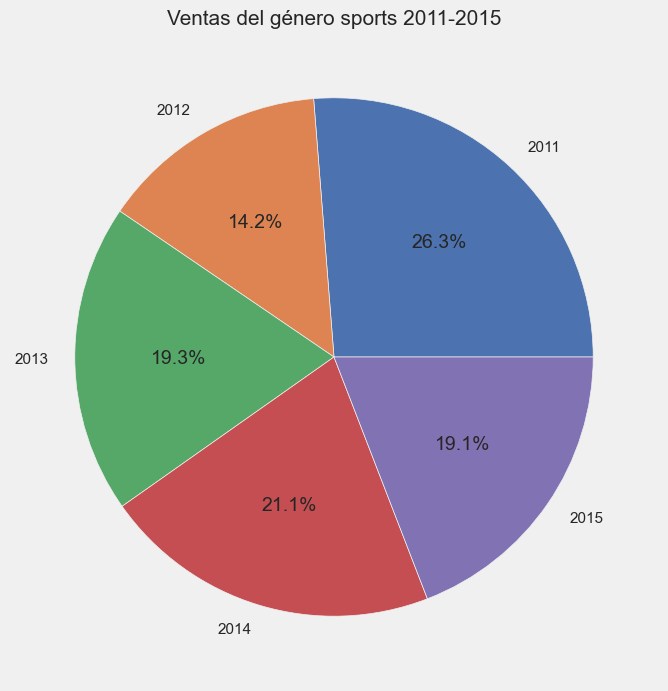

In [119]:
#Tomaremos y agruparemos por las ventas del género Sport
values = df_sports.groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales']

#Iniciamos la Visualización
fig, ax = plt.subplots(1,1, figsize=(10,8))
# colores
colors = sns.color_palette("deep")[0:5]
labels = [2011, 2012, 2013, 2014, 2015]

# grafica
ax.pie(values, labels = labels, colors = colors, autopct='%1.1f%%' )
plt.title('Ventas del género sports 2011-2015', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Ventas de Fighting 2011-2015')

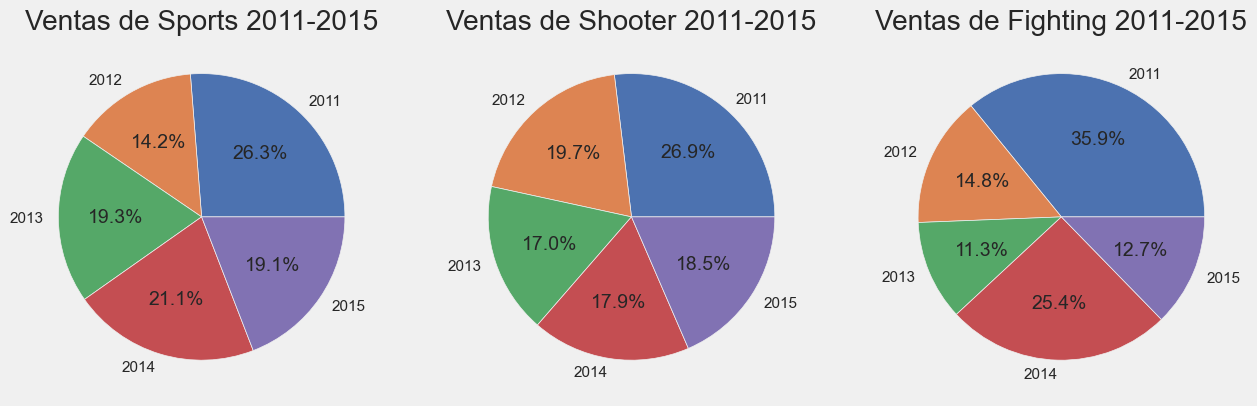

In [120]:
#Ahora, usemos el concepto de vistas paralelas y revisaremos el comportamiento por género:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(14,12))

ax1.pie(df_filtro[df_filtro['Genre']=='Sports'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax1.set_title('Ventas de Sports 2011-2015')

ax2.pie(df_filtro[df_filtro['Genre']=='Shooter'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Ventas de Shooter 2011-2015')

ax3.pie(df_filtro[df_filtro['Genre']=='Fighting'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie
ax3.set_title('Ventas de Fighting 2011-2015')

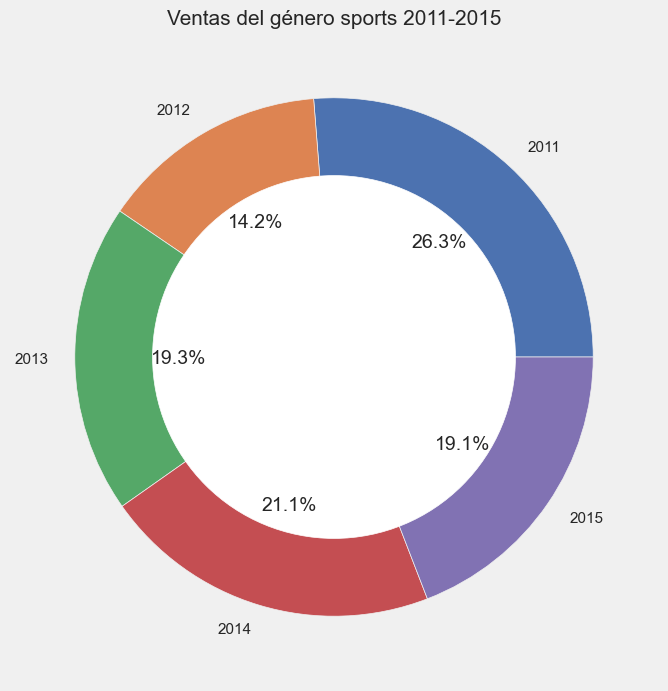

In [121]:
#Usemos la visualización de Donas!

values = df_sports.groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales']

fig, ax = plt.subplots(1,1, figsize=(10,8))
# colores
colors = sns.color_palette("deep")[0:5]
labels = [2011, 2012, 2013, 2014, 2015]

# grafica
ax.pie(values, labels = labels, colors = colors, autopct='%1.1f%%' )
plt.title('Ventas del género sports 2011-2015', fontsize=15)

circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()


Text(0.5, 1.0, 'Ventas de Fighting 2011-2015')

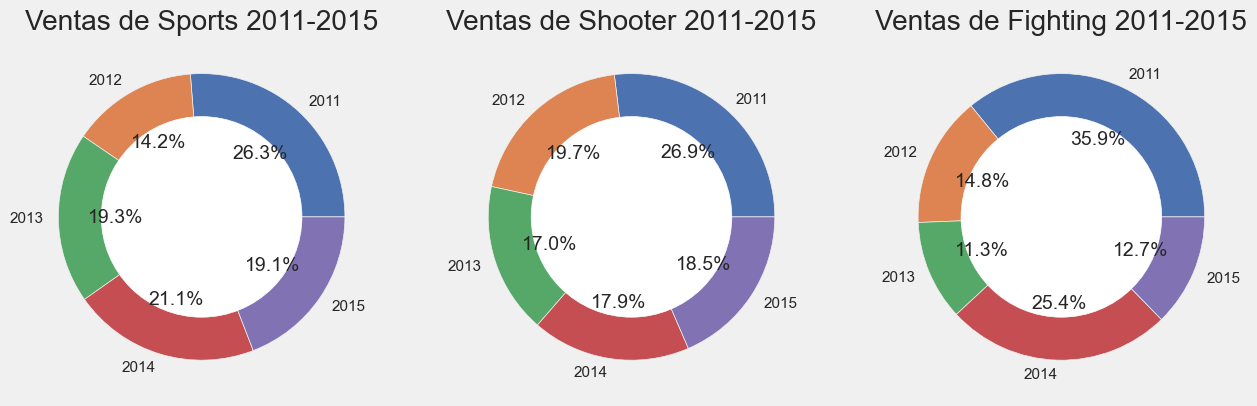

In [122]:
# Comparemos usando el concepto de vistas paralelas

circle = plt.Circle( (0,0), 0.7, color='white')
circle2 = plt.Circle( (0,0), 0.7, color='white')
circle3 = plt.Circle( (0,0), 0.7, color='white')

fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(14,12))

ax1.pie(df_filtro[df_filtro['Genre']=='Sports'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax1.add_artist(circle)
ax1.set_title('Ventas de Sports 2011-2015')

ax2.pie(df_filtro[df_filtro['Genre']=='Shooter'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax2.add_artist(circle2)
ax2.set_title('Ventas de Shooter 2011-2015')

ax3.pie(df_filtro[df_filtro['Genre']=='Fighting'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax3.add_artist(circle3)
ax3.set_title('Ventas de Fighting 2011-2015')

# Ejercicio 4
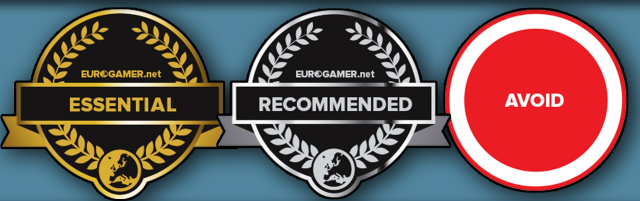

In [123]:
#Escenario ¡Trabajaremos con los score de los usuarios! 
#¿Cuál es la frecuencia con que se "puntuan" los juegos?
#Normalizamos el valor en decenas
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')*10
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Histograma del score de los jugadores')

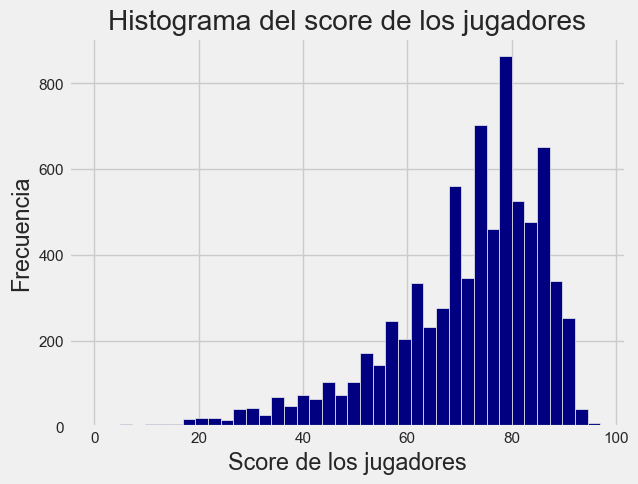

In [130]:
# Escenario: Revisemos la distribución de los datos! = ¿Histogramas?

#Preparamos la visualización
sns.histplot(data = df
            ,x = 'User_Score'
            ,color = 'navy'
            ,alpha = 1 # Opacidad entre 0-1 (intentar 0.5)
            ,bins = 40 #¿Qué tan segregado deseamos los datos? Probar con 20 - 40 - 60 - 2 - 10
            )

plt.xlabel('Score de los jugadores')
plt.ylabel('Frecuencia')

# titulo del plot
plt.title('Histograma del score de los jugadores')

Text(0.5, 1.0, 'Histograma del score de los críticos')

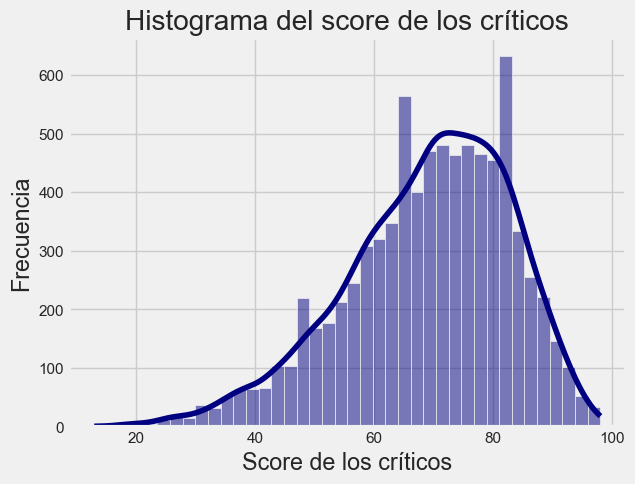

In [131]:
# Escenario: ¿Y si comparamos contra el Score de los críticos?

sns.histplot(data = df
            ,x = 'Critic_Score'
            ,color = 'navy'
            ,alpha = 0.5
            ,bins = 40
            ,kde = True
            )

plt.xlabel('Score de los críticos')
plt.ylabel('Frecuencia')

# titulo del plot
plt.title('Histograma del score de los críticos')

Text(0.5, 1.0, 'Boxplot del score de los jugadores')

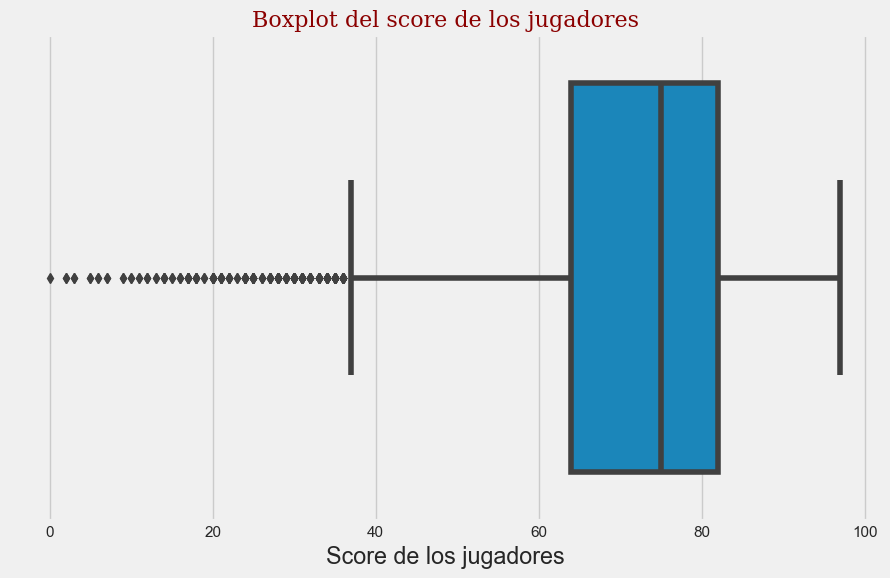

In [132]:
#Escenario: ¿cómo están distribuídos los datos? ¿Dónde está la mayor distribución de los mismos?
#¿Podemos ver los quantiles? ¿Distribución? ¿Desviación? ¿Datos atípicos?

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt_1 = plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df["User_Score"]) #Cambiar por y=df["User_Score"] Recordar renombrar los ejes!

plt.xlabel('Score de los jugadores')

# titulo del plot
plt.title('Boxplot del score de los jugadores', fontdict=font)

Text(0.5, 1.0, 'Boxplot del score de los Críticos')

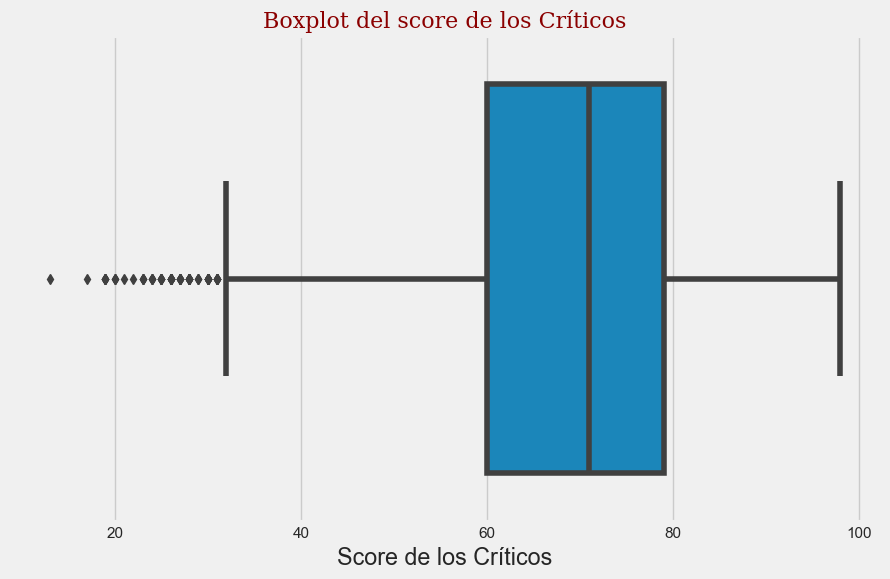

In [135]:
plt_1 = plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df["Critic_Score"])

plt.xlabel('Score de los Críticos')

# titulo del plot
plt.title('Boxplot del score de los Críticos', fontdict=font)

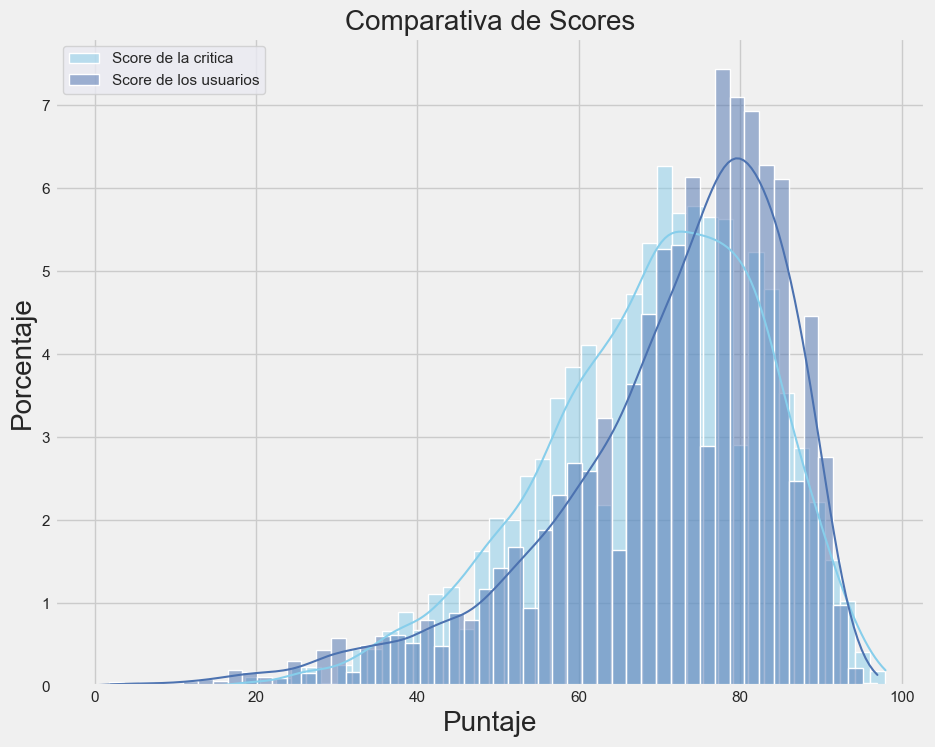

In [136]:
# Escenario: Comparativa entre la crítica de los usuarios y los críticos de juegos en vistas superpuestas (¡layers!)

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.set(style="darkgrid")

sns.histplot(data=df, x="Critic_Score", color="skyblue", label="Score de la critica", kde=True, stat='percent')
sns.histplot(data=df, x="User_Score",  label="Score de los usuarios", kde=True, stat='percent')
ax.set_xlabel("Score", fontsize = 20)
ax.set_ylabel("Porcentaje", fontsize = 20)
ax.set_title("Comparativa de Scores", fontsize = 20)

plt.legend() 
plt.show()

In [137]:
#Guardemos la Visualización
fig.savefig("HistorigramaSocreUserCrit.png", dpi=600, bbox_inches='tight')

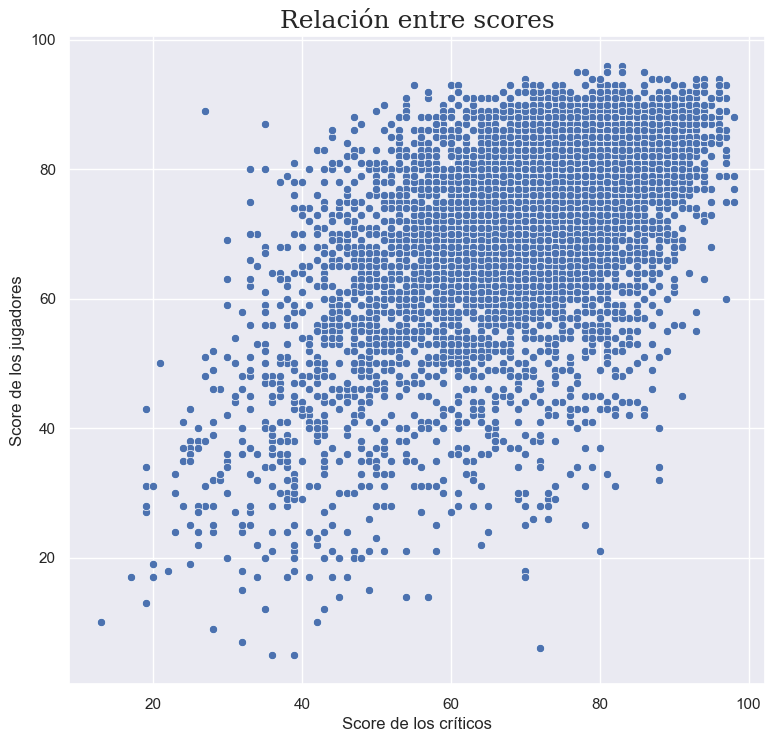

In [138]:
#Escenario: ¿Cómo puedo ver globalmente cómo se distribuyen los datos?
font = {'family': 'serif',
        'weight': 'normal',
        'size': 18,
        }

plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="Critic_Score", y="User_Score")

plt.ylabel('Score de los jugadores')
plt.xlabel('Score de los críticos')

# titulo del plot
plt.title('Relación entre scores', fontdict=font)

plt.show()
     

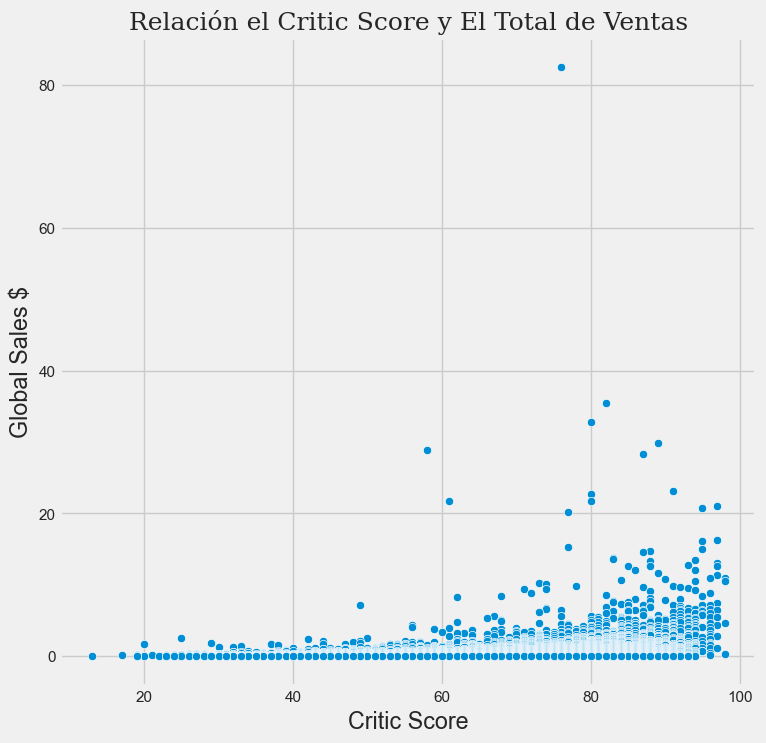

In [167]:
#Escenario: Hipótesis: ¿Entre más Score de la Crítica es Mayor las ventas?
plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="Critic_Score", y="Global_Sales")

plt.ylabel('Global Sales $')
plt.xlabel('Critic Score')

# titulo del plot
plt.title('Relación el Critic Score y El Total de Ventas', fontdict=font)

plt.show()

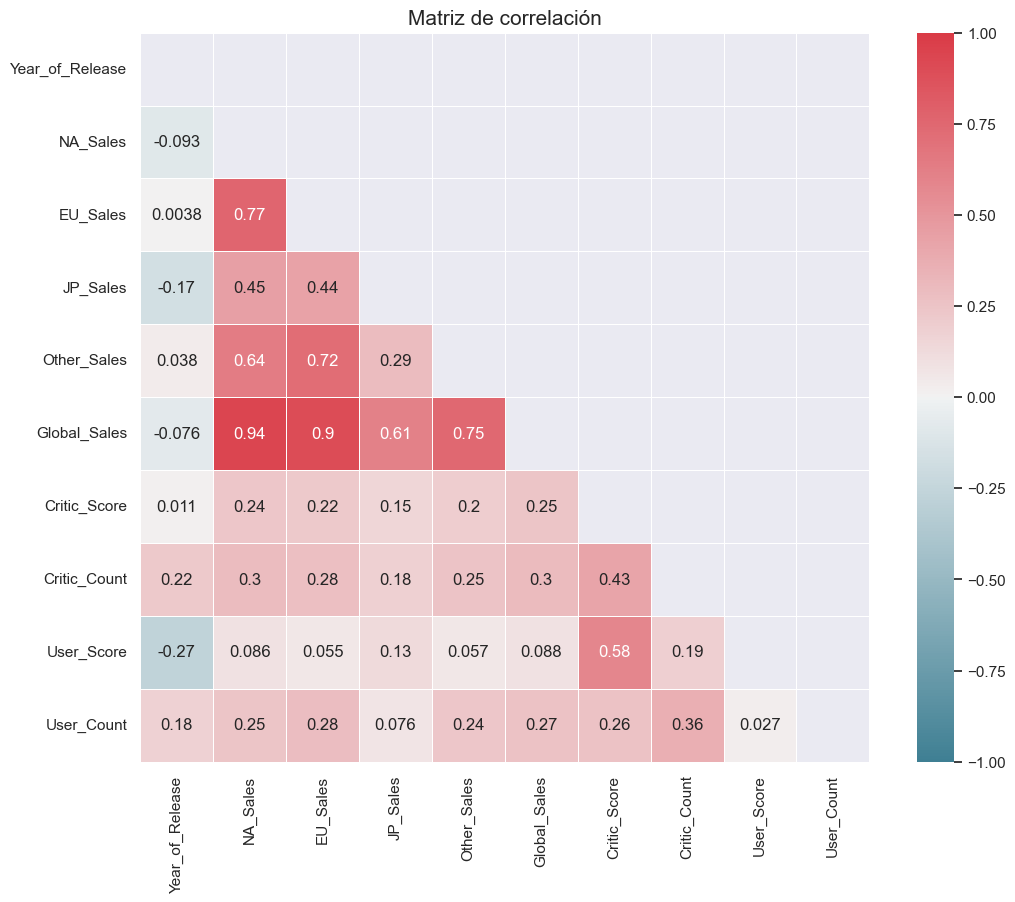

In [142]:
#Escenario: ¿Podemos saber si existe una correlación entre las variables?
# Usemos una matriz de Correlación

d= df
corr = d.corr()

# mascara de ceros
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Inicializa gráfica
f, ax = plt.subplots(figsize=(11, 9))

# mapa de colores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# mapa de calor de la matriz
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, #Intentar cony sin la opción mask=mask,
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Matriz de correlación', fontdict={'fontsize':15})
plt.show()
     

In [143]:
#Guardar la Visualización
f.savefig("MatrixCorr.png", dpi=600, bbox_inches='tight')

In [151]:
#Escenario: ¿Existen "valores" similares entre los scores?
df_agr = df[df['Year_of_Release']==2015.0].copy()
df_agr = df_agr[df_agr['Genre']=='Shooter'] #Probar descomentando y comentando esta línea
df_plot = df_agr.groupby(['Critic_Score','User_Score'], as_index=False)['Global_Sales'].sum()
df_plot.head(5)

,Critic_Score,User_Score,Global_Sales
0,62.0,68.0,0.20
1,62.0,72.0,0.11
2,63.0,66.0,1.74
3,64.0,79.0,0.06
4,71.0,38.0,0.14


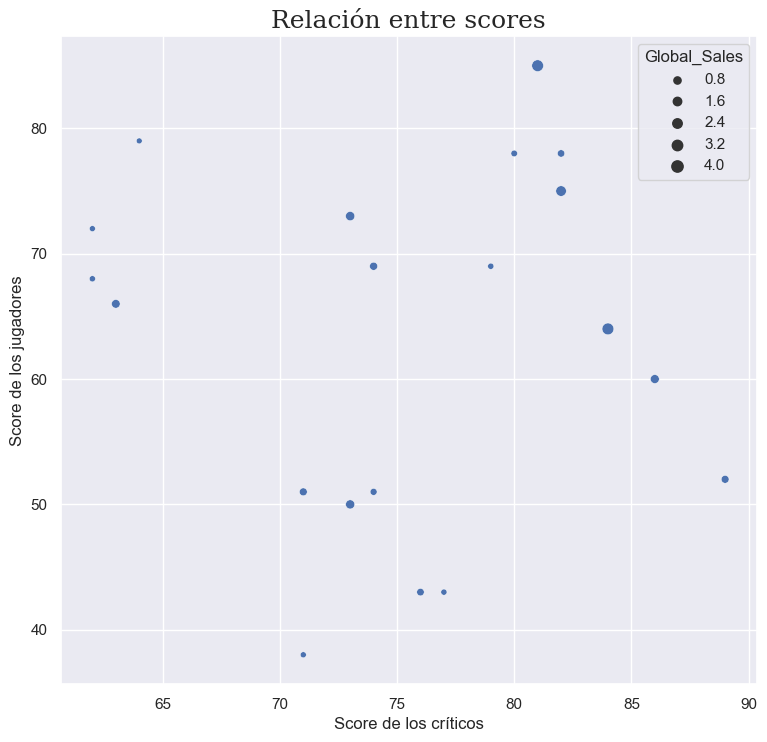

In [152]:
#Escenario: Usando marcas y canales para conocer la distribución de los datos y ver si existen agrupaciones 
# o "valores" que se repiten
plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df_plot, x="Critic_Score", y="User_Score", size='Global_Sales')

plt.ylabel('Score de los jugadores')
plt.xlabel('Score de los críticos')

# titulo del plot
plt.title('Relación entre scores', fontdict=font)

plt.show()